<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/Implementasi-Deteksi-Objek/blob/main/Deteksiyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.68 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5
Silakan unggah file gambar atau video...


Saving buah.jpeg to buah.jpeg
File berhasil diunggah: buah.jpeg
Using device: cpu
detect: weights=['yolov5s.pt'], source=/content/yolov5/buah.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 130MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/buah.jpeg: 640x640 23 apples, 12 oranges, 468.7ms
Speed: 3.5ms pre-process, 468.7ms inference, 3.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
Folder hasil deteksi: ru

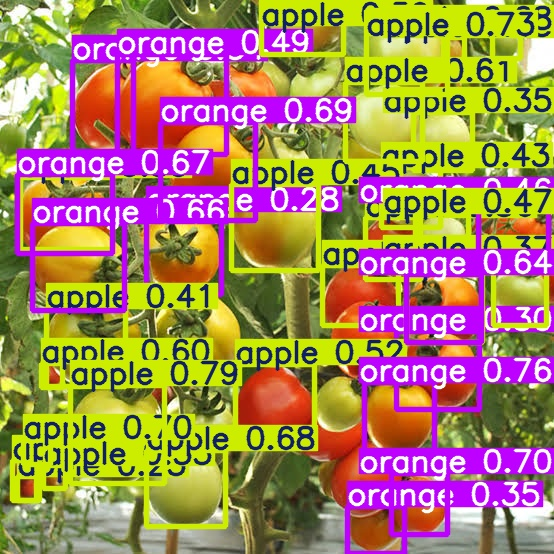

Hasil deteksi ditampilkan. File tersimpan di: runs/detect/exp/buah.jpeg


In [ ]:

# Step 1: Clone YOLOv5 Repository dan Install Dependencies
import os
import shutil

# Clone YOLOv5 repository
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

%cd yolov5

# Install dependencies
!pip install -qr requirements.txt

# Step 2: User Upload File
from google.colab import files
import torch

print("Silakan unggah file gambar atau video...")
uploaded = files.upload()

# Ambil file pertama yang diunggah
if uploaded:
    input_file = list(uploaded.keys())[0]
    input_path = os.path.join('/content/yolov5', input_file)  # Path lengkap untuk file
    shutil.move(input_file, input_path)  # Pindahkan file ke dalam folder YOLOv5
    print(f"File berhasil diunggah: {input_file}")
else:
    print("Tidak ada file yang diunggah. Silakan coba lagi.")

# Step 3: Jalankan Deteksi Objek Menggunakan YOLOv5
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Menyiapkan perintah bash untuk menjalankan deteksi
command = f"python detect.py --weights yolov5s.pt --source {input_path} --device {device}"
!{command}

# Step 4: Tampilkan Hasil Deteksi
from IPython.display import Image, display
import glob

# Cari folder hasil deteksi (runs/detect/)
output_dirs = sorted(glob.glob('runs/detect/*'), key=os.path.getmtime)
if output_dirs:
    latest_dir = output_dirs[-1]  # Folder hasil deteksi terbaru
    print(f"Folder hasil deteksi: {latest_dir}")

    # Tampilkan hasil jika input berupa gambar
    if input_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        result_img_path = os.path.join(latest_dir, input_file)
        if os.path.exists(result_img_path):
            display(Image(filename=result_img_path))
            print(f"Hasil deteksi ditampilkan. File tersimpan di: {result_img_path}")
        else:
            print("Hasil deteksi tidak ditemukan. Periksa folder output.")
    else:
        print("Deteksi selesai untuk video. Periksa folder output untuk hasilnya.")
else:
    print("Hasil deteksi tidak ditemukan. Periksa log error.")